# Experimenting on ants

In [40]:
from pathlib import Path

import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np
from mujoco import viewer
from stable_baselines3 import SAC


## Observing the observations

In [32]:
ant_xml = Path("assets/ant.xml").resolve()
# env = gym.make('Ant-v4', ctrl_cost_weight=0.1, use_contact_forces=True, render_mode="human")
env = gym.make("Ant-v4", xml_file=str(ant_xml), render_mode="rgb_array")

In [33]:
observation, info = env.reset()

In [34]:
observation

array([ 0.70309881,  0.9937413 ,  0.057911  ,  0.04848387, -0.08230344,
       -0.03604109, -0.09834601,  0.07954979,  0.04010811, -0.01337302,
        0.07705055, -0.04478797,  0.00921745,  0.02839587,  0.26842767,
        0.06950089,  0.15198205,  0.13858326, -0.11716754, -0.05721212,
       -0.00229935,  0.02017162, -0.10700454, -0.11429689, -0.16181757,
       -0.00875838, -0.05994741])

In [28]:
s1, r1, terminated, truncated, inform = env.step([0]*8)

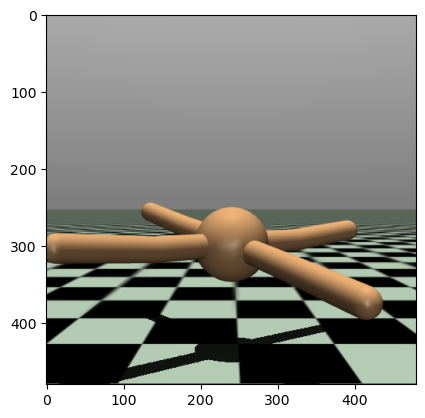

In [38]:
plt.imshow( )

## Saccing

In [3]:
# Loading the model
model = SAC.load("sac_ant_v2")

In [3]:
model = SAC("MlpPolicy", env, verbose=1)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [5]:
model.learn(total_timesteps=1_000_000)

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 62.8     |
|    ep_rew_mean     | 46.3     |
| time/              |          |
|    episodes        | 4        |
|    fps             | 32       |
|    time_elapsed    | 7        |
|    total_timesteps | 251      |
| train/             |          |
|    actor_loss      | -13      |
|    critic_loss     | 2.75     |
|    ent_coef        | 0.956    |
|    ent_coef_loss   | -0.601   |
|    learning_rate   | 0.0003   |
|    n_updates       | 150      |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 175      |
|    ep_rew_mean     | 120      |
| time/              |          |
|    episodes        | 8        |
|    fps             | 27       |
|    time_elapsed    | 51       |
|    total_timesteps | 1402     |
| train/             |          |
|    actor_loss      | -31.2    |
|    critic_loss     | 1.52     |
|    ent_coef 

In [5]:
obs, info = env.reset()
for _ in range(1000):
    action, _states = model.predict(obs, deterministic=True) 
    obs, reward, terminated, truncated, info = env.step(action)
    if terminated or truncated:
        obs, info = env.reset()


: 

In [4]:
# Saving the model
# model.save("sac_ant_v2")

# Loading the model
model = SAC.load("sac_ant")
